In [5]:
# Importing Libraries

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [8]:
#  Loading the Iris dataset

iris=datasets.load_iris()
#  Features and labels
X=iris.data
y=iris.target   

In [11]:
print(X[0],y[0])

[5.1 3.5 1.4 0.2] 0


In [12]:
# Split the dataset into a training set and a test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the K-Nearest Neighbors classifier

clf=KNeighborsClassifier(n_neighbors=3)

In [14]:
# Train the classifier on the training data
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [17]:
print(y_pred[0])   # Iris-Versicolour

1


In [18]:
print(iris.DESCR)  

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [20]:
# Calculate and print precision
precision = precision_score(y_test, y_pred, average='weighted')  
print("Precision:", precision)

Precision: 1.0


In [21]:
# Calculate and print recall
recall = recall_score(y_test, y_pred, average='weighted')  
print("Recall:", recall)

Recall: 1.0


In [22]:
# Calculate and print F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  
print("F1-Score:", f1)

F1-Score: 1.0


In [23]:
# Calculate ROC and AUC for each class
y_scores = clf.predict_proba(X_test)  # Predicted probabilities for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

In [24]:
# Calculate ROC curve and AUC for each class
for i in range(3):  # Three classes in Iris dataset
    fpr[i], tpr[i], _ = roc_curve((y_test == i), y_scores[:, i])
    roc_auc[i] = roc_auc_score((y_test == i), y_scores[:, i])


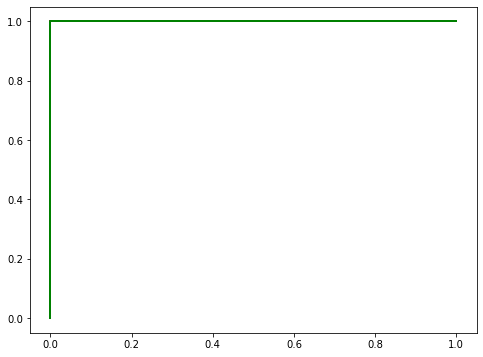

In [25]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


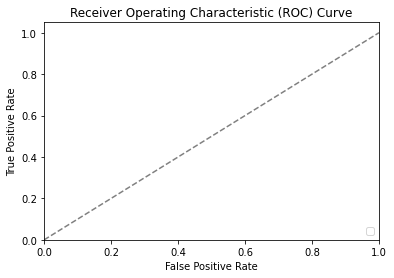

In [26]:
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()